# SpaceX Dataset

We are going to build several ML models on Falcon 9 Datasetof **SpaceX** company.

SpaceX guarantees that due to the reuse of the primary stage, it can carry the Falcon 9 rocket to the space station less expensive than the contenders and with 65 million bucks, while the contending organizations do this with more than 2.6 times and with a figure of 165 They make a great many dollars.
In this project, by analyzing this dataset, we need to predict the reuse rate of the first stage by various ML models, such as LogesticRegression, DecssionTre  and SVM. We will use Grid Search to find the best parameters for each of them
Finally, we can recognize that which model has best performance to deploy on the dataset.

In [1]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
data = pd.read_excel('dataset_falcon9.xlsx')

In [3]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,NaN,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,NaN,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0


In [4]:
data['Class'].value_counts()

Class
1    60
0    30
Name: count, dtype: int64

# Target

We want to know on each launch whether the first stage has landed successfully or not, which is shown right from the **Class** column. Therefore, our target is this column, which will be in class 1 if the landing is successful and in class 0 if not.

Now, let's start exploring the data so that we can prepare it for building the models.
# EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     81 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

In [6]:
data['BoosterVersion'].unique()

array(['Falcon 9'], dtype=object)

In [7]:
# PayloadMass is the weight that the rocket carries.
data['PayloadMass'].describe()

count       81.000000
mean      6379.736885
std       4835.862084
min        350.000000
25%       2708.000000
50%       5000.000000
75%       9600.000000
max      15600.000000
Name: PayloadMass, dtype: float64

In [8]:
# Orbits that rockets entered in different launches.
data['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [9]:
# Checking the geographical coordinates of the launch.
print(data['LaunchSite'].value_counts())
print(data['Longitude'].value_counts())
print(data['Latitude'].value_counts())

LaunchSite
CCAFS SLC 40    53
KSC LC 39A      20
VAFB SLC 4E     13
Name: count, dtype: int64
Longitude
-80.577366     55
-80.603956     22
-120.610829    13
Name: count, dtype: int64
Latitude
28.561857    55
28.608058    22
34.632093    13
Name: count, dtype: int64


Considering the cell above, we come to the conclusion that we can drop the two columns **Longitude** and **Latitude** in the data preparation process.

In [10]:
# Outcome column shows that Landing success or failure.
data['Outcome'].value_counts()

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [11]:
data['Flights'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [12]:
# Boolean Columns
print(data['GridFins'].value_counts())
print(data['Reused'].value_counts())
print(data['Legs'].value_counts())

GridFins
True     70
False    20
Name: count, dtype: int64
Reused
False    53
True     37
Name: count, dtype: int64
Legs
False    73
True     17
Name: count, dtype: int64


In [13]:
print(data['LandingPad'].value_counts())
print(data['ReusedCount'].value_counts())
print(data['Block'].value_counts())

LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64
ReusedCount
0    30
1    24
3    12
5    11
2     9
4     4
Name: count, dtype: int64
Block
5    39
1    19
3    15
4    11
2     6
Name: count, dtype: int64


# Visualization to understand the relationship between options influencing success or failure

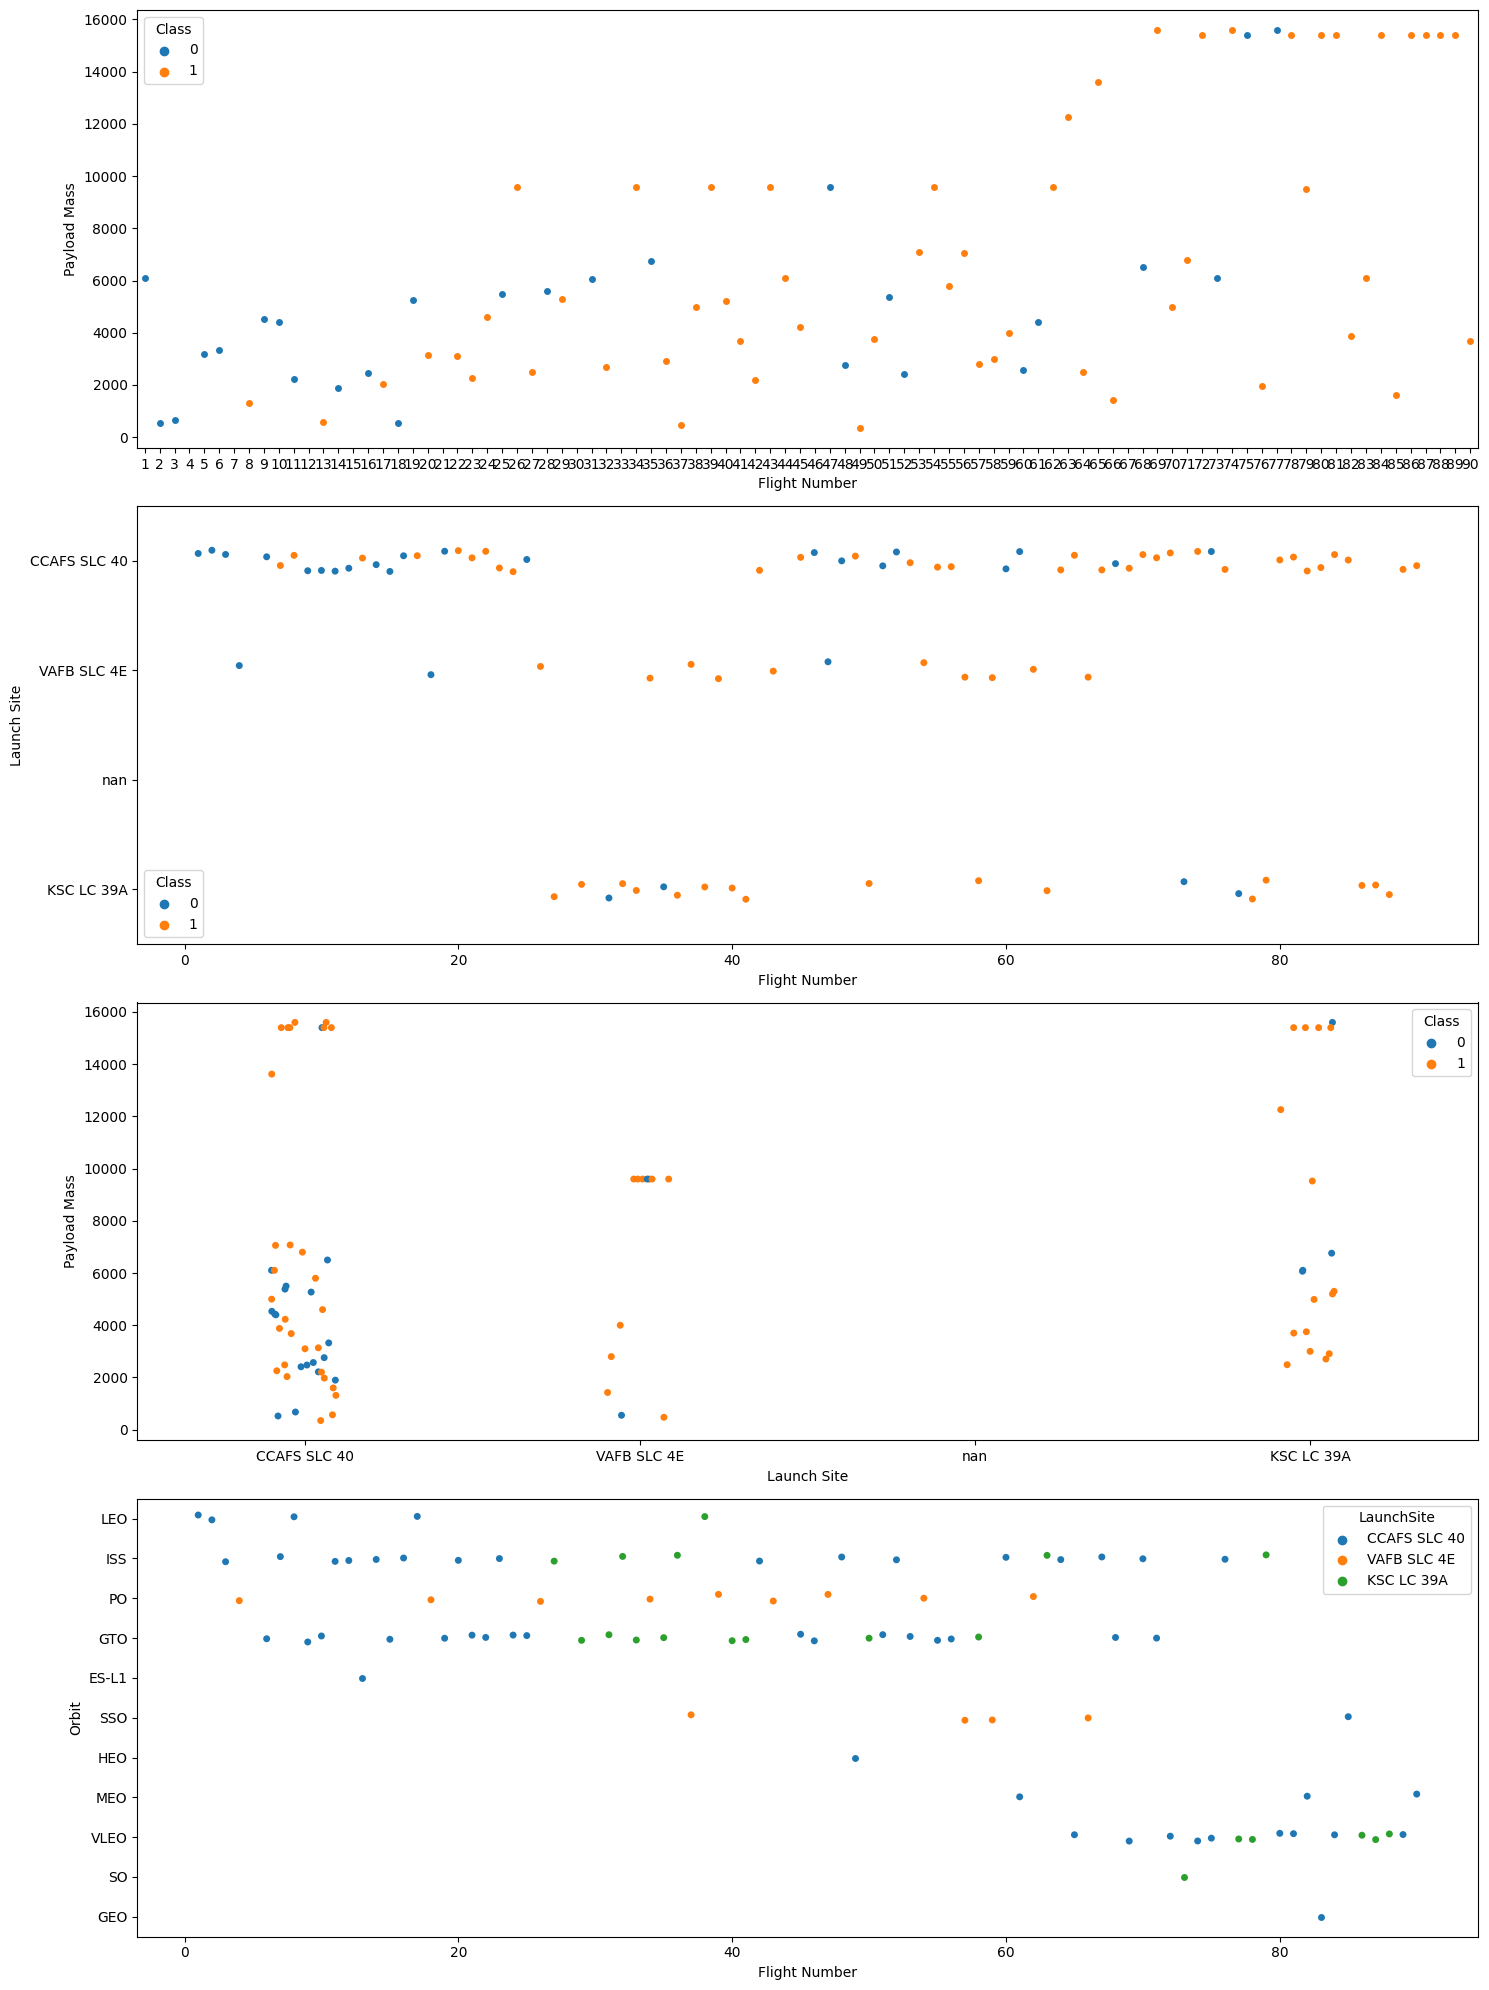

In [14]:
# Create a 4x1 grid of subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

# Catplot for the first subplot
sns.stripplot(y='PayloadMass', x='FlightNumber', hue='Class', data=data, ax=axes[0])
axes[0].set_xlabel('Flight Number', fontsize=10)
axes[0].set_ylabel('Payload Mass', fontsize=10)

# Catplot for the second subplot
sns.stripplot(y='LaunchSite', x='FlightNumber', hue='Class', data=data, ax=axes[1])
axes[1].set_xlabel('Flight Number', fontsize=10)
axes[1].set_ylabel('Launch Site', fontsize=10)

# Catplot for the third subplot
sns.stripplot(y='PayloadMass', x='LaunchSite', hue='Class', data=data, ax=axes[2])
axes[2].set_xlabel('Launch Site', fontsize=10)
axes[2].set_ylabel('Payload Mass', fontsize=10)

# Catplot for the fourth subplot
sns.stripplot(y='Orbit', x='FlightNumber', hue='LaunchSite', data=data, ax=axes[3])
axes[3].set_xlabel('Flight Number', fontsize=10)
axes[3].set_ylabel('Orbit', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Data Pre-processing

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     81 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

**Considering all the columns, we can drop the columns that have no effect in this step.**

In [16]:
df = data.drop(['FlightNumber', 'Date', 'BoosterVersion', 'Longitude', 'Latitude'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  81 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   86 non-null     object 
 3   Outcome      90 non-null     object 
 4   Flights      90 non-null     int64  
 5   GridFins     90 non-null     bool   
 6   Reused       90 non-null     bool   
 7   Legs         90 non-null     bool   
 8   LandingPad   64 non-null     object 
 9   Block        90 non-null     int64  
 10  ReusedCount  90 non-null     int64  
 11  Serial       90 non-null     object 
 12  Class        90 non-null     int64  
dtypes: bool(3), float64(1), int64(4), object(5)
memory usage: 7.4+ KB


**We can see that some of the columns have null cells. Let's maintain them.**

In [18]:
df['PayloadMass']

0      6104.959412
1       525.000000
2       677.000000
3              NaN
4      3170.000000
          ...     
85    15400.000000
86    15400.000000
87    15400.000000
88    15400.000000
89     3681.000000
Name: PayloadMass, Length: 90, dtype: float64

In [19]:
df['PayloadMass'] = df['PayloadMass'].replace(np.nan, df['PayloadMass'].mean())

In [20]:
df['PayloadMass'].unique()

array([ 6104.95941176,   525.        ,   677.        ,  6379.73688453,
        3170.        ,  3325.        ,  1316.        ,  4535.        ,
        4428.        ,  2216.        ,   570.        ,  1898.        ,
        2477.        ,  2034.        ,   553.        ,  5271.        ,
        3136.        ,  3100.        ,  2257.        ,  4600.        ,
        5500.        ,  9600.        ,  2490.        ,  5600.        ,
        5300.        ,  6070.        ,  2708.        ,  6761.        ,
        2910.        ,   475.        ,  4990.        ,  5200.        ,
        3700.        ,  2205.        ,  4230.        ,  2760.        ,
         350.        ,  3750.        ,  5383.85      ,  2410.        ,
        7076.        ,  5800.        ,  7060.        ,  2800.        ,
        3000.        ,  4000.        ,  2573.        ,  4400.        ,
       12259.        ,  2482.        , 13620.        ,  1425.        ,
        6500.        , 15600.        ,  5000.        ,  6800.        ,
      

In [21]:
df['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    53
KSC LC 39A      20
VAFB SLC 4E     13
Name: count, dtype: int64

In [22]:
df['LaunchSite'] = df['LaunchSite'].replace(np.nan, 'CCAFS SLC 40')

In [23]:
len(df['LaunchSite'])

90

In [24]:
df['LandingPad'].value_counts()

LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64

In [25]:
df_landingpad = df[df['LandingPad'] == '5e9e3032383ecb6bb234e7ca']
set(df_landingpad['Orbit'])

{'GTO', 'HEO', 'ISS', 'MEO', 'VLEO'}

In [26]:
df_1 = df[['LandingPad', 'Orbit']]
df_1

,LandingPad,Orbit
0,NaN,LEO
1,NaN,LEO
2,NaN,ISS
3,NaN,PO
4,NaN,GTO
...,...,...
85,5e9e3032383ecb6bb234e7ca,VLEO
86,5e9e3032383ecb6bb234e7ca,VLEO
87,5e9e3032383ecb6bb234e7ca,VLEO
88,5e9e3033383ecbb9e534e7cc,VLEO


In [27]:
pd.isnull(df_1['LandingPad'])

0      True
1      True
2      True
3      True
4      True
      ...  
85    False
86    False
87    False
88    False
89    False
Name: LandingPad, Length: 90, dtype: bool

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   Outcome      90 non-null     object 
 4   Flights      90 non-null     int64  
 5   GridFins     90 non-null     bool   
 6   Reused       90 non-null     bool   
 7   Legs         90 non-null     bool   
 8   LandingPad   64 non-null     object 
 9   Block        90 non-null     int64  
 10  ReusedCount  90 non-null     int64  
 11  Serial       90 non-null     object 
 12  Class        90 non-null     int64  
dtypes: bool(3), float64(1), int64(4), object(5)
memory usage: 7.4+ KB


In [29]:
df.head(3)

,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,0
1,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,0
2,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,0


**Now, we have to convert categorical variables to numerical.**

In [30]:
df.columns

Index(['PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins',
       'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial',
       'Class'],
      dtype='object')

In [31]:
df_dummy = pd.get_dummies(df[['Orbit','LaunchSite','Outcome','LandingPad','Serial']], dtype='int')
df_dummy

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [32]:
df['GridFins'] = df['GridFins'].astype(int)
df['Reused'] = df['Reused'].astype(int)
df['Legs'] = df['Legs'].astype(int)

In [33]:
df = df.drop(['Orbit','LaunchSite','Outcome','LandingPad','Serial'], axis=1)

In [34]:
df = pd.concat([df, df_dummy], axis=1)

In [35]:
df

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104.959412,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6379.736885,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2,1,1,1,5,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15400.000000,3,1,1,1,5,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15400.000000,6,1,1,1,5,5,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15400.000000,3,1,1,1,5,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
# to check the dataframe in the case of null cells
df.isnull()

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
86,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
87,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
set(df.isnull().sum())

{0}

Our data is ready for our model!
# Define X and y

In [38]:
X = df.drop('Class',axis=1)
Y = df['Class']

In [39]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_scaled

array([[-0.06026754, -0.65391284, -1.87082869, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.2841322 , -0.65391284, -1.87082869, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [-1.25079371, -0.65391284, -1.87082869, ..., -0.21566555,
        -0.18569534, -0.10599979],
       ...,
       [ 1.97843397,  3.49060516,  0.53452248, ..., -0.21566555,
        -0.18569534, -0.10599979],
       [ 1.97843397,  1.00389436,  0.53452248, ..., -0.21566555,
         5.38516481, -0.10599979],
       [-0.59191984, -0.65391284,  0.53452248, ..., -0.21566555,
        -0.18569534,  9.43398113]])

In [40]:
col = X.columns
X = pd.DataFrame(x_scaled, columns=col)
X

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-6.026754e-02,-0.653913,-1.870829,-0.835532,-0.482573,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.284132e+00,-0.653913,-1.870829,-0.835532,-0.482573,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.250794e+00,-0.653913,-1.870829,-0.835532,-0.482573,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,1.994815e-16,-0.653913,-1.870829,-0.835532,-0.482573,-1.575895,-0.973440,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-7.039986e-01,-0.653913,-1.870829,-0.835532,-0.482573,-1.575895,-0.973440,-0.106,-0.106,1.527525,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.978434e+00,0.174991,0.534522,1.196843,2.072225,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.978434e+00,1.003894,0.534522,1.196843,2.072225,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.978434e+00,3.490605,0.534522,1.196843,2.072225,0.945537,1.966480,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.978434e+00,1.003894,0.534522,1.196843,2.072225,0.945537,0.202528,-0.106,-0.106,-0.654654,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


In [41]:
set(X.isnull().sum())

{0}

# Building Models
Let's start by splitting our data into a training set and test set.
## Train Test Split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [43]:
# Function for ploting the confusion matrix for all models we will build.
def plot_confusion_matrix(Y, Y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(Y, Y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Did not land', 'Land']); ax.yaxis.set_ticklabels(['Did not land', 'Landed'])

# Logistic Regression

In [44]:
lr = LogisticRegression()
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
logreg_cv = GridSearchCV(lr, parameters, cv=4)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [45]:
print('tuned hyperparameters: (best parameters) ', logreg_cv.best_params_)
print('accuracy: ', logreg_cv.best_score_)

tuned hyperparameters: (best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy:  0.875


In [46]:
# Create list to collect the results of all the models
accu = []
methods = []
accu.append(logreg_cv.score(X_test, Y_test))
methods.append('Logistic Regression')
logreg_cv.score(X_test, Y_test)

0.8888888888888888

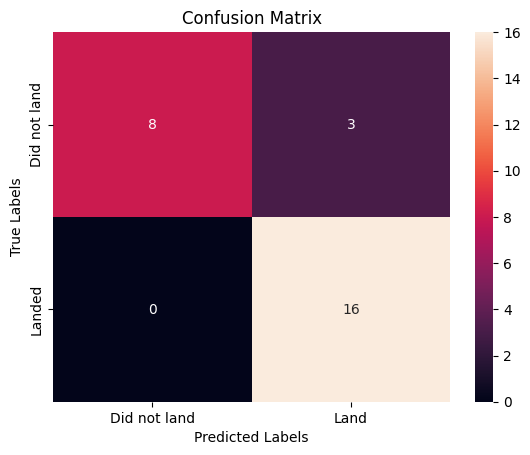

In [47]:
Yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, Yhat)

# Support Vector Machine

In [48]:
svm = SVC()
parameters = {'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid'), "C": (0.5, 1, 1.5)}
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [49]:
print('tuned hyperparameters: (best parameters) ', svm_cv.best_params_)
print('accuracy: ', svm_cv.best_score_)

tuned hyperparameters: (best parameters)  {'C': 1, 'kernel': 'sigmoid'}
accuracy:  0.9357142857142857


In [50]:
accu.append(svm_cv.score(X_test, Y_test))
methods.append('Support Vector Machine')
svm_cv.score(X_test, Y_test)

0.8888888888888888

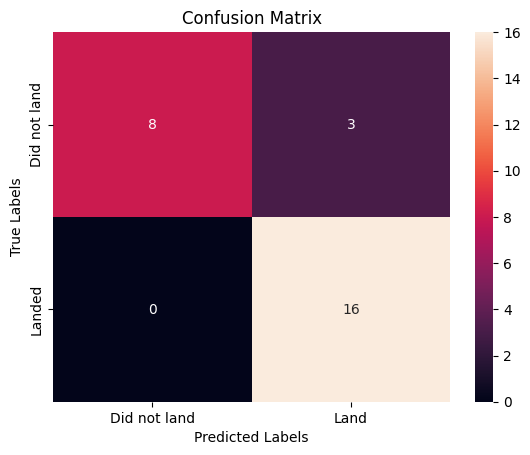

In [51]:
Yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, Yhat)

# Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2*n for n in range(1,10)],
               'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}             
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

In [ ]:
print('tuned hyperparameters: (best parameters) ', tree_cv.best_params_)
print('accuracy: ', tree_cv.best_score_)

In [ ]:
accu.append(tree_cv.score(X_test, Y_test))
methods.append('Decision Tree')
tree_cv.score(X_test, Y_test)

In [ ]:
Yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, Yhat)

In [ ]:
print(accu)
print(methods)

In [ ]:
fig = plt.figure(figsize=(8,4))
plt.bar(methods, accu, color='violet', width=0.6)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Best Performed Method')
plt.show()

According to the above diagram, we can decide which of the models performed better and can be used in the project deployment.

**This was a project for the Applied Data Scientist course. 
Thank you for taking the time to read this notebook. I welcome your comments and suggestions for my improvement.**
# with the best wishes